<a href="https://colab.research.google.com/github/FranzDS01/InteligenciaArtifical/blob/main/Laboratorios/lab09/Regresion_Multivariable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### repositorio
Soria Colque Franz Ronald
https://github.com/FranzDS01/InteligenciaArtifical/blob/main/Laboratorios/lab09/Regresion_Multivariable.ipynb

## Regresion Multivariables

El dataset utilizado en este caso se refiere a la emisión de carbono generada por los coches. Se emplea el algoritmo del descenso de gradiente múltiple y la ecuación de la normal para realizar predicciones.

Dado que el dataset contiene columnas no numéricas, se realiza una conversión de estas columnas a valores numéricos. Esto se lleva a cabo mediante la función "convertir_categoricas_int(categoricas, data)". Esta función toma como parámetros las columnas no numéricas y el dataset, asignando un valor numérico único a cada fila. Sin embargo, si existen varias filas con el mismo valor de texto, se les asigna el mismo valor numérico.

Una vez que los datos han sido procesados, se procede a encontrar los mejores valores de theta utilizando el algoritmo del descenso de gradiente múltiple. Para este caso en particular con  valores de alfa=0.001 y un número óptimo de iteraciones de 12000.

Al realizar la predicción utilizando datos del mismo dataset, por ejemplo, con X_prueba=[1,1,1,1600,1390], se obtiene una predicción de emisión de carbono de 100 tanto utilizando el descenso de gradiente como aplicando la ecuación de la normal.

En resumen, mediante el uso del descenso de gradiente múltiple y la ecuación de la normal, se logra realizar predicciones de emisión de carbono basadas en los datos del dataset. La conversión de columnas no numéricas a valores numéricos y la búsqueda de los mejores valores de theta contribuyen a obtener resultados más precisos en las predicciones. En el caso específico de los datos de prueba, se obtiene una predicción de emisión de carbono de 100 tanto con el descenso de gradiente como con la ecuación de la normal.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [ ]:
def cargar_dataset(ruta):
    data=pd.read_csv(ruta)
    return data

In [ ]:
def eliminar_columnas(columnas,data):
    data=data.drop(columnas, axis=1)
    return data

In [ ]:
def convertir_categoricas_int(categoricas,data):
    for columna in categoricas:
        le = LabelEncoder()
        data[columna] = le.fit_transform(data[columna])
    return  data

In [ ]:
def convertir_fechas_int(columna_fecha,data):
    for columna in columna_fecha:
         data[columna] = pd.to_numeric(data[columna].map(datetime.timestamp))
    return data

In [ ]:
def llenar_null_int(columna_null,data):
    media_columna=data[columna_null].mean()
    data[columna_null]=data[columna_null].fillna(media_columna)
    return data

In [ ]:
def graficar(x, y,labelX,labelY):
    # Grafica los puntos x e y en una figura nueva.
    fig = plt.figure()  # abre una nueva figura
    plt.plot(x, y, 'ro', ms=10, mec='k')
    plt.ylabel(labelY)
    plt.xlabel(labelX)

In [ ]:
def featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [ ]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0]  # numero de ejemplos de entrenamiento
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(h - y))

    return J

In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0]  # numero de ejemplos de entrenamiento
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history


In [ ]:
def predicciones(X_array,mu,sigma,theta):
    X_array[1:] = (X_array[1:] - mu) / sigma
    price = np.dot(X_array, theta)   # Se debe cambiar esto
    print('Prediccion de la emision de CO2 , con la caracteristicas del coche de prueba: C02 {:.0f}'.format(price))

In [ ]:

data=cargar_dataset('../Datasets/emisionCarbonoCoches.csv')
categoricas=data.select_dtypes(include=['object']).columns
convertir_categoricas_int(categoricas,data)
data.info()
print(data)
data=data.to_numpy()
X=data[:,:4]
y=data[:,4]
m=y.shape[0]
X_norm, mu, sigma = featureNormalize(X)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Car     36 non-null     int32
 1   Model   36 non-null     int32
 2   Volume  36 non-null     int64
 3   Weight  36 non-null     int64
 4   CO2     36 non-null     int64
dtypes: int32(2), int64(3)
memory usage: 1.2 KB
    Car  Model  Volume  Weight  CO2
0    14     10    1000     790   99
1    10     29    1200    1160   95
2    12     14    1000     929   95
3     2      4     900     865   90
4     9     16    1500    1140  105
5    15     31    1000     929  105
6    12     18    1400    1109   90
7     8      5    1500    1365   92
8     3     19    1500    1112   98
9     0      6    1600    1150   99
10    6     21    1100     980   99
11   13     30    1300     990  101
12    3     19    1000    1112   99
13    4     15    1600    1252   94
14    5     22    1600    1326   97
15   11      9    1600    133

Theta calculado a partir de la acuacion descenso de gradiente:[102.02715465  -0.11915521   1.50100093   3.08307153   1.71800879]
Prediccion de la emision de CO2 , con la caracteristicas del coche de prueba: C02 100


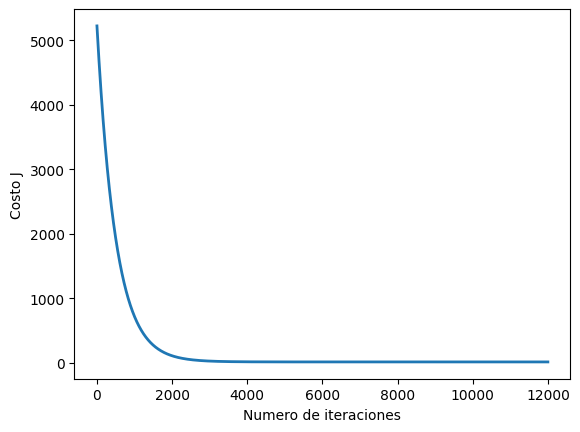

In [ ]:
alpha = 0.001  # alpha = 0.003
num_iters = 12000
theta = np.zeros(5)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
print('Theta calculado a partir de la acuacion descenso de gradiente:{:s}'.format(str(theta)))
x=np.arange(len(J_history))
plt.plot(x, J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')
X_prueba=[1,1,1,1600,1390]
predicciones(X_prueba,mu,sigma,theta)
#graficar(X[:,1:],y,'X','CO2')
#plt.plot(X[:,1:],np.dot(X, theta),lw=2)

# Ecuacion de la normal

In [ ]:
def normalEqn(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    return theta

In [ ]:
# Calcula los parametros con la ecuación de la normal
data=cargar_dataset('../Datasets/emisionCarbonoCoches.csv')
categoricas=data.select_dtypes(include=['object']).columns
data=convertir_categoricas_int(categoricas,data)
data.info()
data=data.to_numpy()
X=data[:,:4]
y=data[:,4]
X = np.concatenate([np.ones((m, 1)), X], axis=1)
theta = normalEqn(X, y)
# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)))
# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios
X_prueba=[1,1,1,1600,1390]#prediccion para este dato alrededor 108
price = np.dot(X_prueba, theta)
print('Prediccion de la emision de CO2, con la caracteristicas del coche de prueba :CO2{: .0f}'.format(price))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Car     36 non-null     int32
 1   Model   36 non-null     int32
 2   Volume  36 non-null     int64
 3   Weight  36 non-null     int64
 4   CO2     36 non-null     int64
dtypes: int32(2), int64(3)
memory usage: 1.2 KB
Theta calculado a partir de la ecuación de la normal: [ 7.74605420e+01 -2.81251830e-02  1.52953191e-01  8.16380599e-03
  6.97855917e-03]
Prediccion de la emision de CO2, con la caracteristicas del coche de prueba :CO2 100
